In [1]:
import pandas as pd
milk = pd.read_csv(r'C:\Users\One\Git\COURSERA YANDEX\Course 5\week 18\monthly-milk-production.csv',';', parse_dates=['month'], dayfirst=True)
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


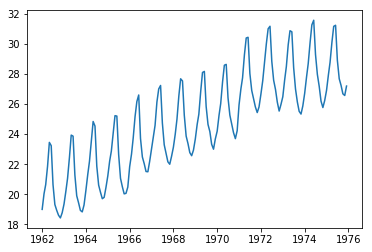

In [2]:
from calendar import monthrange as mr

capitalizer = lambda x: x.days_in_month
milk['days'] = milk['month'].map(capitalizer)

milk['avg'] = milk.milk / milk.days

plt.plot(milk['month'], milk['avg'])

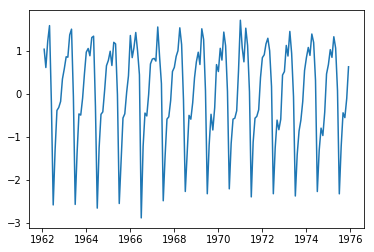

In [3]:
milk['daily_diff1'] = milk.avg - milk.avg.shift(1)
plt.plot(milk['month'], milk['daily_diff1'])

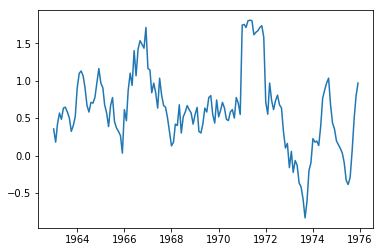

In [4]:
milk['daily_diff12'] = milk.avg - milk.avg.shift(12)
plt.plot(milk['month'], milk['daily_diff12'])

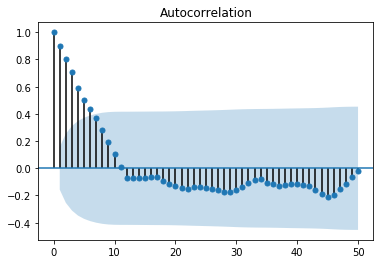

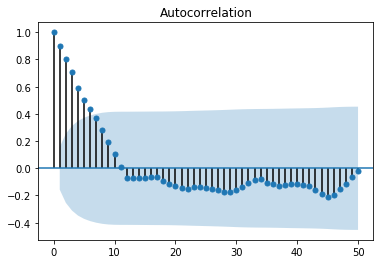

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(milk.daily_diff12.dropna().values.squeeze(), lags=50)

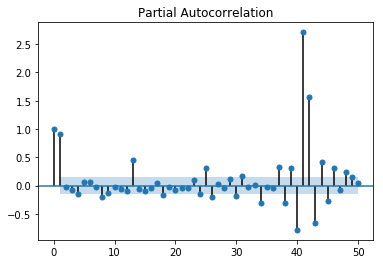

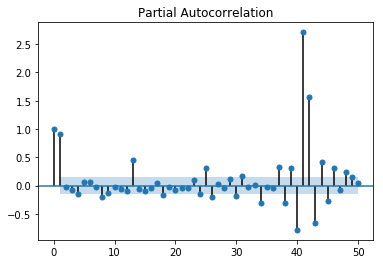

In [9]:
plot_pacf(milk.daily_diff12.dropna().values.squeeze(), lags=50)

In [18]:
milk['daily_diff'] = milk['daily_diff12'][12:] - milk['daily_diff12'][12:].shift(1)

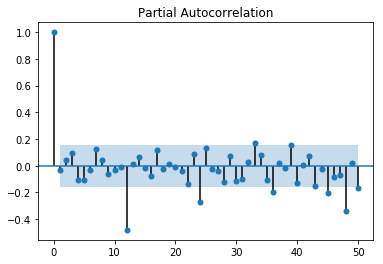

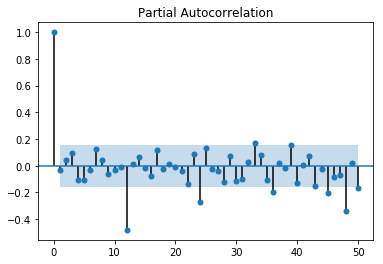

In [19]:
plot_pacf(milk.daily_diff[13:].values.squeeze(), lags=50)